In [109]:
# !pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
data = pd.read_csv("Desktop/ml-scripts/house-price-prediction/housing.csv")
data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [111]:
# check for null values
data.info()
# drop rows include null values
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  flo

In [112]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [114]:
train_data = X_train.join(y_train)
train_data



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9902,-122.27,38.28,37.0,1170.0,303.0,766.0,302.0,2.6618,NEAR BAY,136200.0
11299,-117.93,33.78,28.0,4380.0,820.0,2187.0,835.0,3.9018,<1H OCEAN,182300.0
15791,-122.42,37.77,52.0,759.0,323.0,421.0,255.0,2.0548,NEAR BAY,162500.0
7292,-118.22,33.98,34.0,2225.0,753.0,2980.0,736.0,1.6685,<1H OCEAN,128800.0
7728,-118.13,33.92,28.0,3069.0,864.0,1932.0,835.0,2.4925,<1H OCEAN,177200.0
...,...,...,...,...,...,...,...,...,...,...
18668,-121.91,36.99,23.0,5675.0,964.0,2197.0,880.0,4.8693,NEAR OCEAN,322300.0
1825,-122.32,37.93,33.0,296.0,73.0,216.0,63.0,2.6750,NEAR BAY,22500.0
5497,-118.41,34.00,30.0,3550.0,934.0,3738.0,880.0,3.1910,<1H OCEAN,271200.0
17720,-121.78,37.34,11.0,3195.0,410.0,1774.0,418.0,7.0671,<1H OCEAN,378200.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

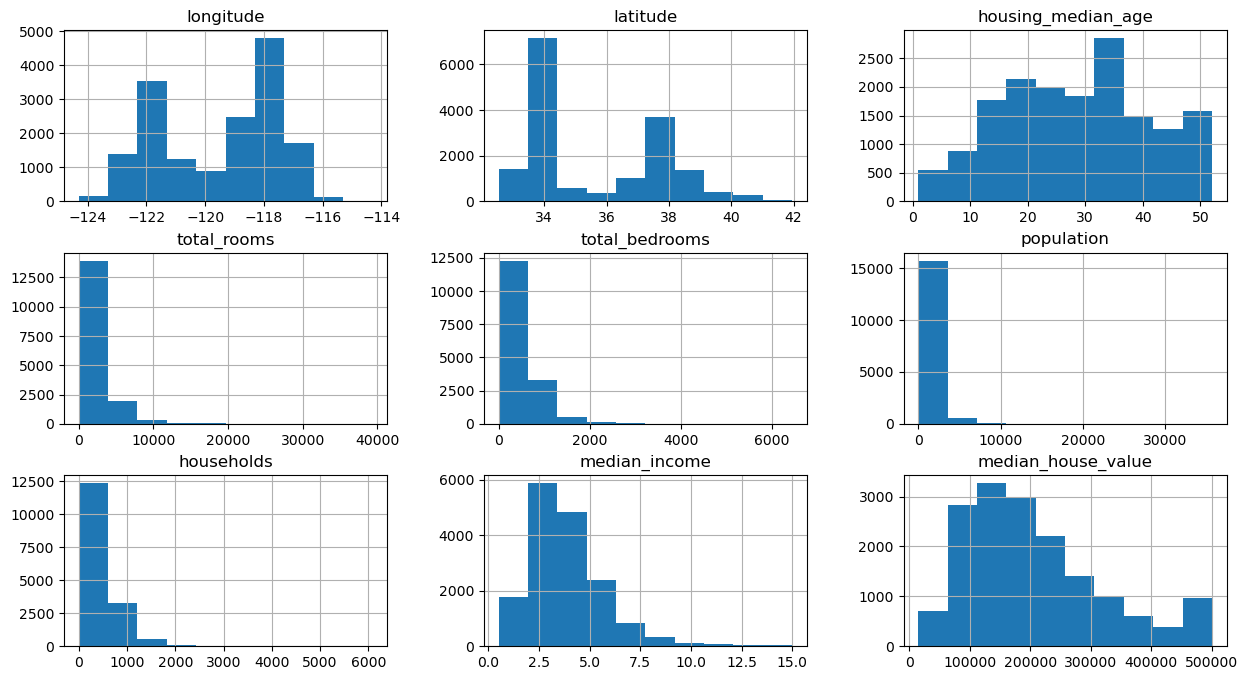

In [115]:
train_data.hist(figsize=(15, 8))

<AxesSubplot:>

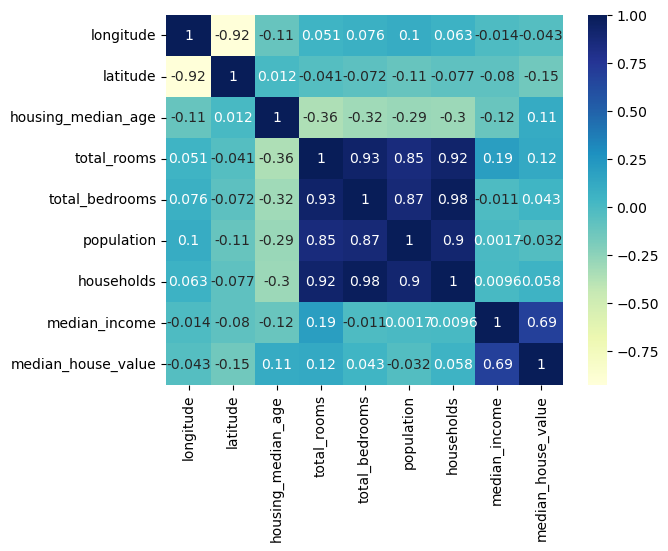

In [116]:
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

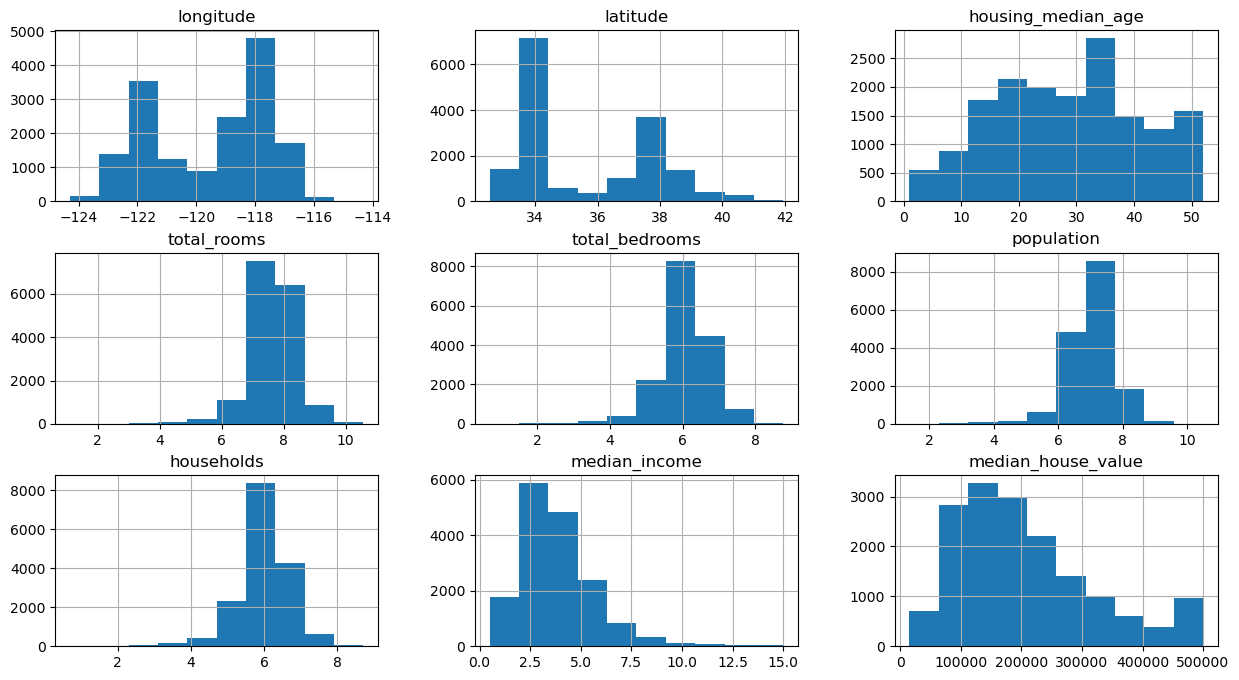

In [117]:
# to make the histograms more gausian-bell-like
# it is right-skewed now

train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

train_data.hist(figsize=(15,8))

In [118]:
# one-hot encoding for ocean_proximity
train_data.ocean_proximity.value_counts()

pd.get_dummies(train_data.ocean_proximity)

# merge with train_data
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)


<AxesSubplot:>

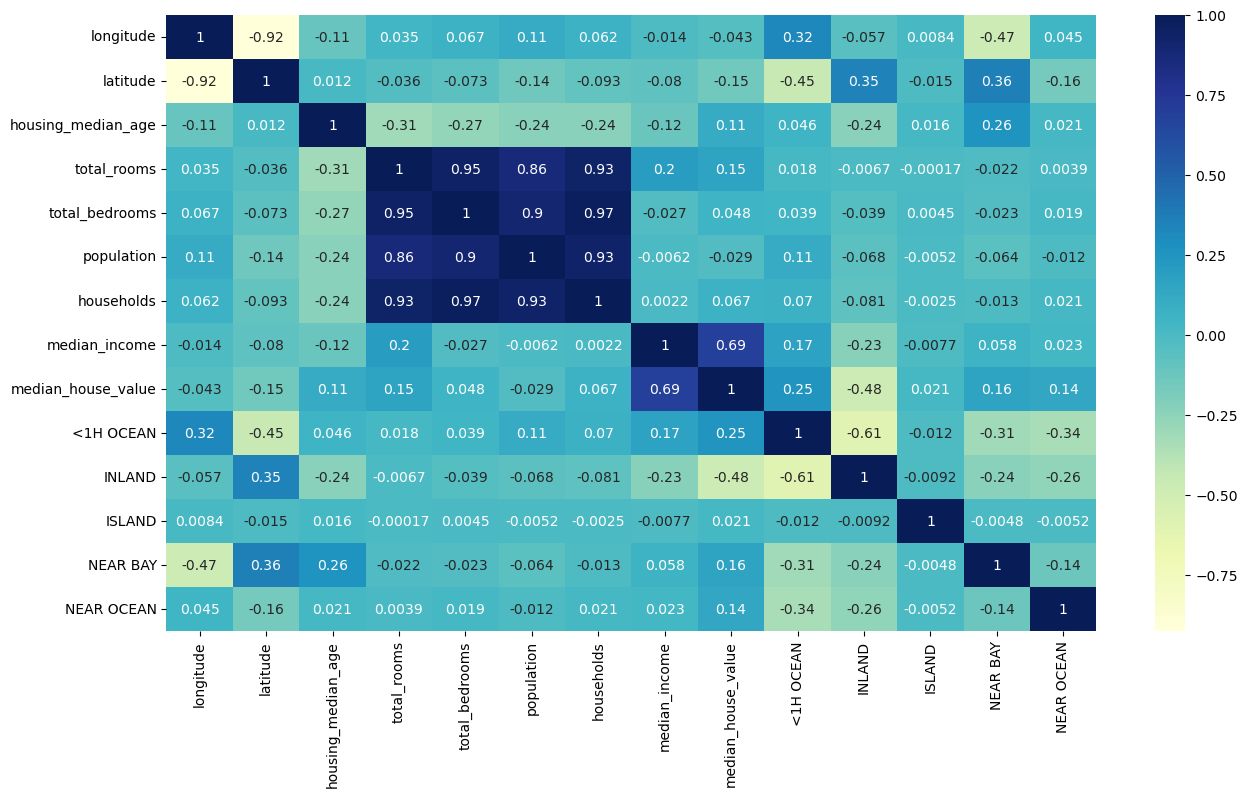

In [119]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

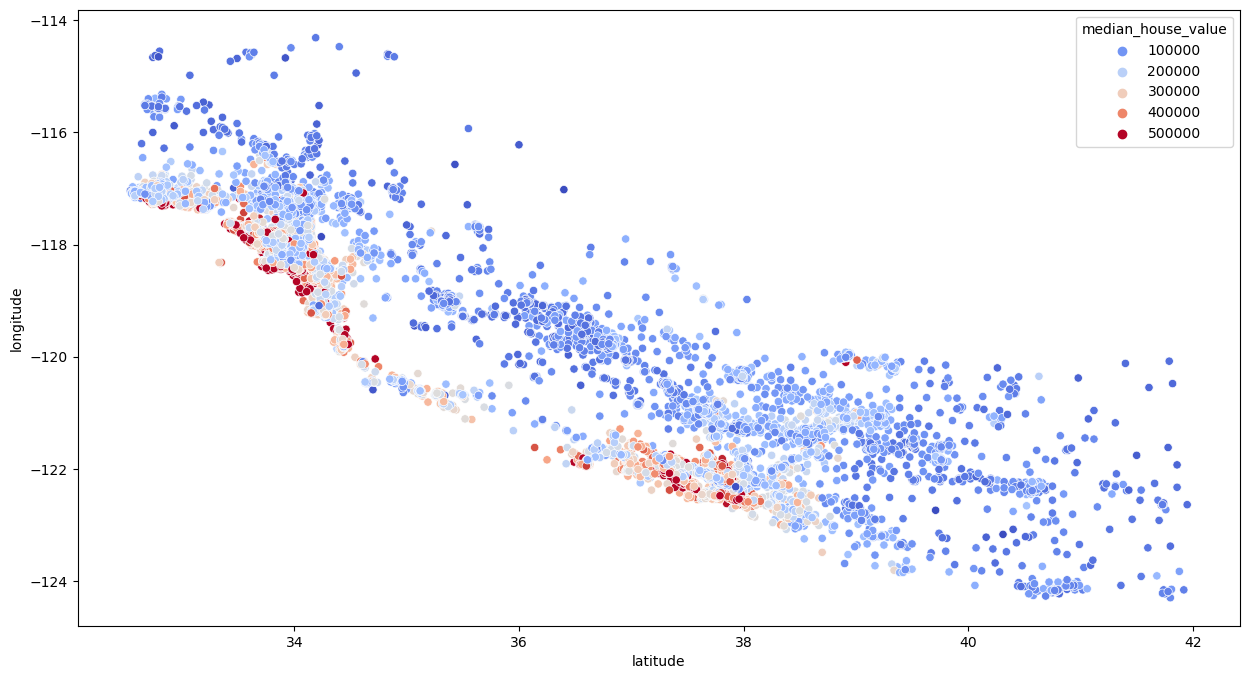

In [120]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [121]:
# feature engineering

# new feature - bedroom ratio

train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<AxesSubplot:>

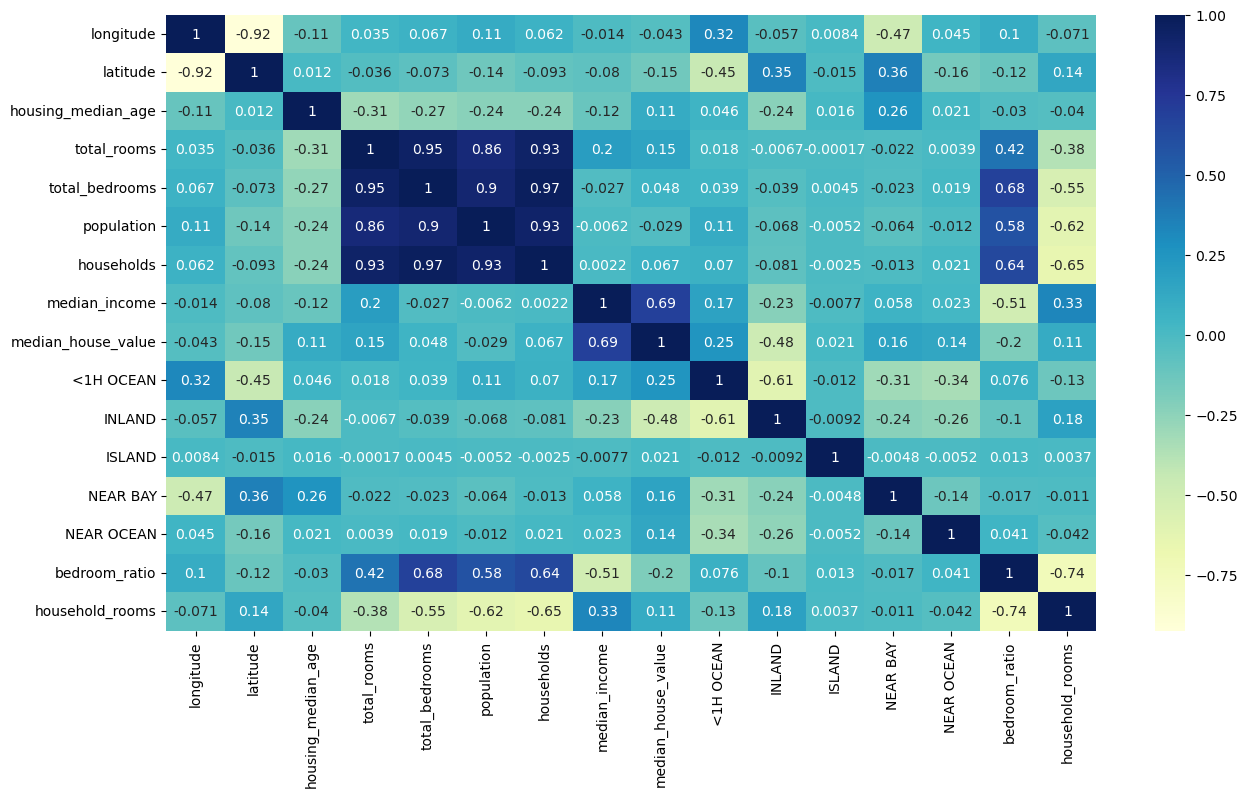

In [122]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [124]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [125]:

X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [126]:
X_test_s = scaler.fit_transform(X_test)

In [127]:
reg.score(X_test_s, y_test)

0.6709540516661326

In [128]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)
forest.score(X_test_s, y_test)

0.7955917560430956

In [ ]:
from sklearn.model_selection import GridSearchCV

# provide parameter grid for hyperparameter tuning

forest = RandomForestRegressor()

param_grid = {
    "n_estimators" : [100, 200, 300],
    "min_samples_split" : [2, 4],
    "max_depth" : [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train_s, y_train)

In [101]:
best_forest = grid_search.best_estimator_

In [105]:
best_forest.score(X_test_s, y_test)

0.7951398551962102